
# Advance Lane Finding Project

## Chessboard Calibration

In [16]:
import cv2
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

imgpts = []

chessColumns = 9
chessRows = 6

chessDim = (chessColumns, chessRows)

# List comprehension instead of glob to make it easier to pick out
# a particular image to undistort.
calibimgpaths = ['camera_cal/calibration{}.jpg'.format(i) for i in range(1,20+1)]
print(calibimgpaths)

calibimgs = list(map(cv2.imread, calibimgpaths))

for img in calibimgs:
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, chessDim)
    #print('ret: {}, corners: {}'.format(ret, corners))
    if ret:
        imgpts.append(corners)
    
    imgcorners = img.copy()
    #cv2.drawChessboardCorners(imgcorners, chessDim, corners, ret)
    #plt.imshow(img)

# 3D points for chessboard lying in xz-plane
objp = np.zeros((chessColumns*chessRows,3), np.float32)
objp[:,:2] = np.mgrid[0:chessColumns,0:chessRows].T.reshape(-1,2) # keep third dimension 

objpts = [objp] * len(imgpts)

ret, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpts, imgpts, calibimgs[0].shape[1::-1], None, None)

['camera_cal/calibration1.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration9.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration20.jpg']


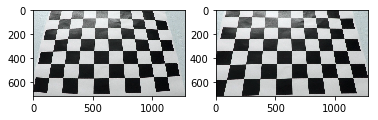

In [15]:
# Show one img restored
distorted = calibimgs[3-1]
undistorted = cv2.undistort(distorted, cameraMatrix, distCoeffs)

plt.subplot(121)
plt.imshow(distorted)

plt.subplot(122)
plt.imshow(undistorted)